<a href="https://colab.research.google.com/github/Yomunozs/Procesamiento_Digital_de_Senales/blob/main/PDS_Consulta_Forma_Matricial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representación Matricial de la Transformada de Fourier

En esta sección, exploraremos la representación de la Transformada de Fourier en forma matricial, utilizada frecuentemente en aplicaciones computacionales y en álgebra lineal.

## Definición Matemática

La Transformada Discreta de Fourier (DFT) puede expresarse en forma matricial como:

$$ X = W_N x $$

Donde:
- $X$ es el vector transformado en el dominio de la frecuencia.
- $x$ es el vector de entrada en el dominio del tiempo.
- $W_N$ es la matriz de Fourier de tamaño $N \times N$, cuyos elementos están definidos como:

$$ W_N(k, n) = e^{-j 2\pi kn/N} $$

La matriz $W_N$ es una matriz de coeficientes exponenciales complejos que permite calcular la DFT mediante un producto matricial en lugar de una suma directa.

## Construcción de la Matriz de Fourier

La matriz $W_N$ tiene una estructura especial donde cada elemento está dado por una raíz de la unidad compleja elevada a una potencia específica.

- La primera fila y la primera columna de $W_N$ contienen solo unos.
- Cada fila representa una frecuencia armónica creciente.
- Los valores son simétricos y periódicos en torno a $N$.

## Ejemplo: Matriz de Fourier $4 \times 4$

Para $N = 4$, la matriz de Fourier $W_4$ se construye como:

$$
W_4 = \begin{bmatrix}
1 & 1 & 1 & 1 \\
1 & e^{-j\pi/2} & e^{-j\pi} & e^{-j3\pi/2} \\
1 & e^{-j\pi} & e^{-j2\pi} & e^{-j3\pi} \\
1 & e^{-j3\pi/2} & e^{-j3\pi} & e^{-j9\pi/2}
\end{bmatrix}
$$

# Consulta: Implicaciones de modificar la dimension de la matriz de fourier

* If 𝑁 is smaller than the signal length, information is lost due to undersampling in the frequency domain.

* If 𝑁 is larger, additional zero-padding occurs, leading to finer frequency resolution.

* Left-over dimensions in the Fourier matrix influence spectral leakage and resolution.

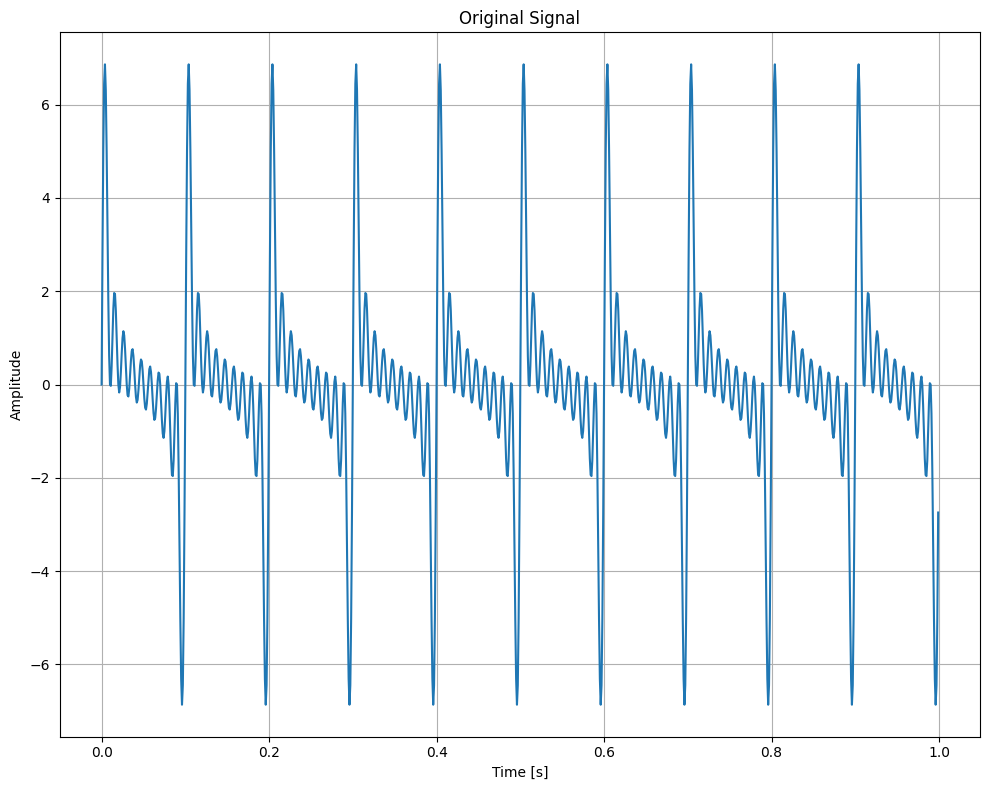

1000
[250, 200, 1000, 2000, 5000]


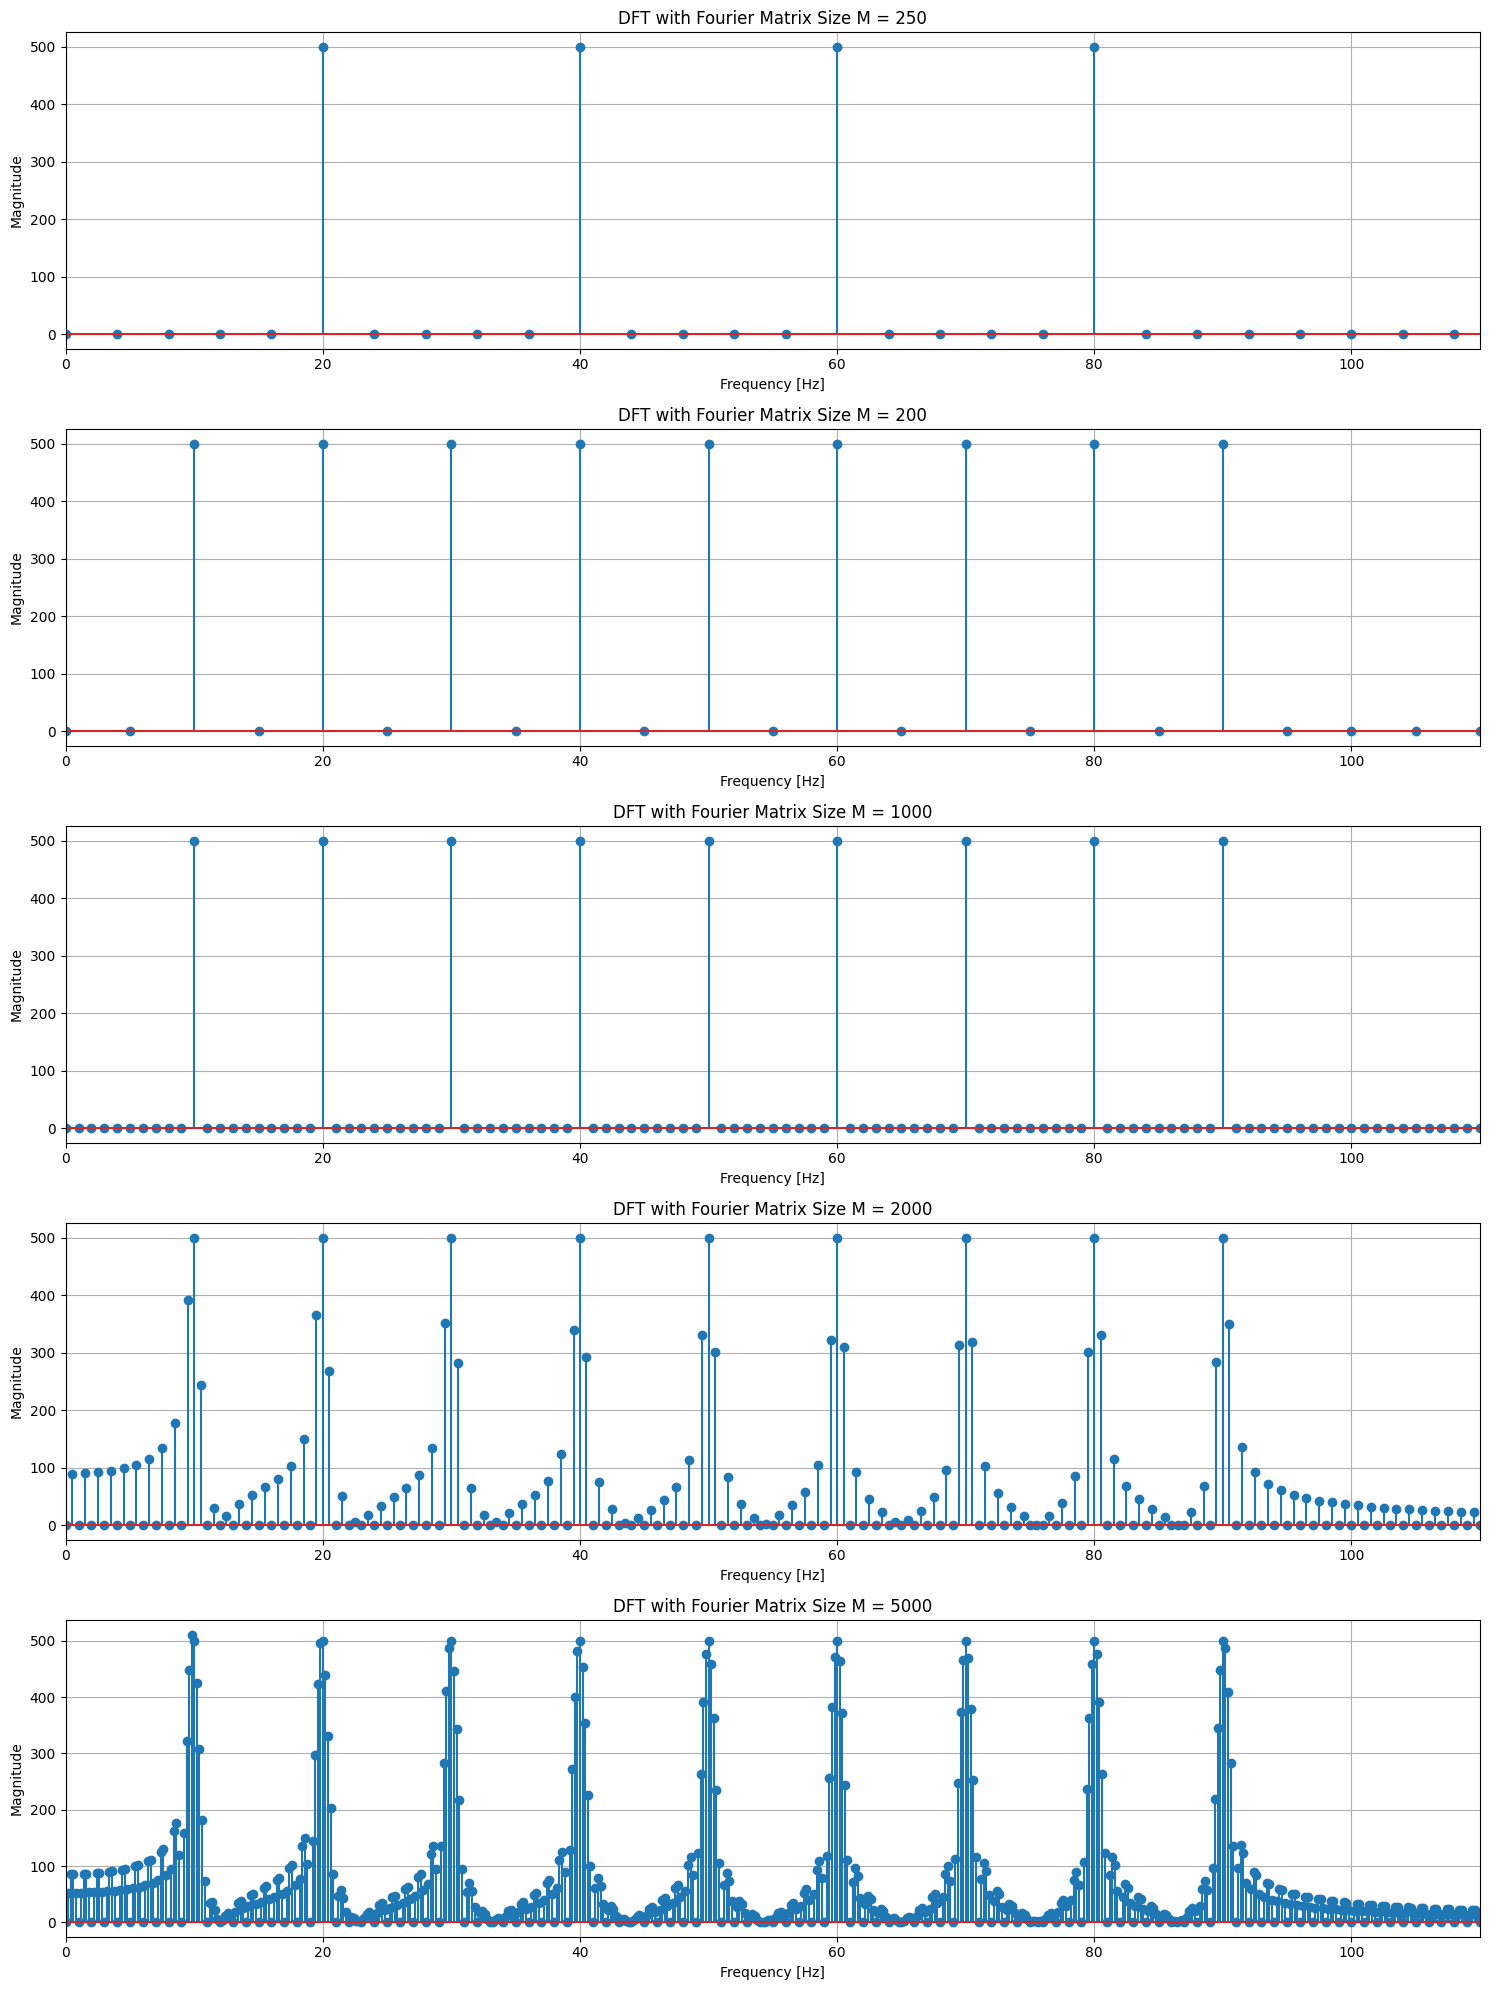

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
fs = 1000  # Sampling frequency
duration = 1  # Duration of the signal in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# Fundamental frequencies
fundamental_frequencies = np.arange(10, 100, 10)

# Generate signal with multiple fundamental frequencies
signal = np.zeros_like(t)
for freq in fundamental_frequencies:
    signal += np.sin(2 * np.pi * freq * t)

# Plot the original signal
plt.figure(figsize=(10, 8))
plt.plot(t, signal)
plt.title("Original Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.grid()
plt.show()
Nt = len(t)
print(Nt)
M_values = [int(Nt/4), int(Nt/5), Nt, 2*Nt, 5*Nt]
print(M_values)

# Function to compute DFT using Fourier matrix
def compute_dft(signal, M):
    N = len(signal)
    # Create Fourier matrix of size M x N
    k = np.arange(M).reshape(M, 1)
    l = np.arange(N)
    F = np.exp(-2j * np.pi * k * l / M)
    # Compute DFT
    X = F @ signal
    return X

# Compute DFT with different Fourier matrix sizes
# M_values = [50, 100, 500, 1000, 2000]  # Test with smaller, equal, and larger sizes
results = {}

for M in M_values:
    X = compute_dft(signal, M)
    results[M] = X

# Plot the magnitude of the DFT for each case
frequencies = np.arange(0, fs, fs / len(signal))  # Frequency vector for original signal

plt.figure(figsize=(15, 20))
for i, M in enumerate(M_values):
    X = results[M]
    freq_M = np.arange(0, fs, fs / M)  # Frequency vector for DFT of size M

    plt.subplot(len(M_values), 1, i+1)
    plt.stem(freq_M[:M//2], np.abs(X[:M//2]))
    plt.title(f"DFT with Fourier Matrix Size M = {M}")
    plt.xlim(0, 110)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid()

plt.tight_layout()
plt.show()